In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("water_potability.csv")
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
null_per = df.isnull().mean() * 100
print(null_per)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


In [6]:
float_cols = df.select_dtypes(include=['float']).columns
for col in float_cols:
   median_value = df[col].median()  
   df[col].fillna(median_value, inplace=True)  

In [7]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [8]:
for col in df.columns:
    unique_values = df[col].unique()
    if len(unique_values) < 10:  
        print(f"Column: {col}")
        
        print(unique_values)
        print("-" * 40)

Column: Potability
[0 1]
----------------------------------------


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


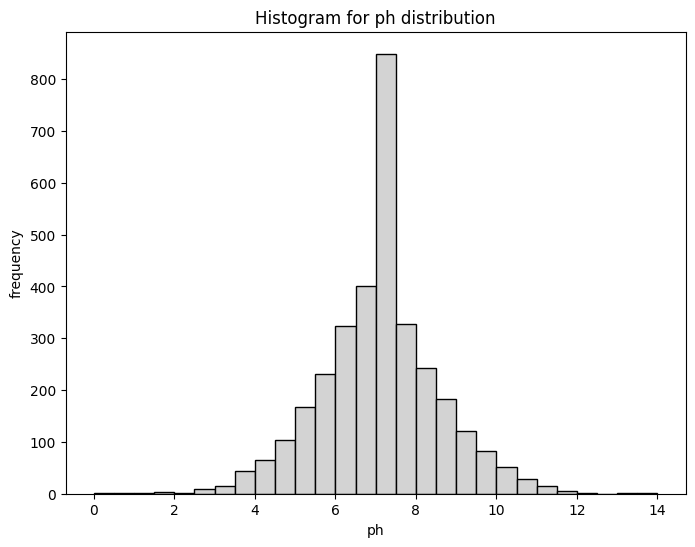

In [13]:
plt.figure(figsize = (8,6))
plt.hist(df['ph'], bins = 28, color = 'lightgrey', edgecolor = 'black') #bins -> interval gap
plt.title('Histogram for ph distribution')
plt.xlabel('ph')
plt.ylabel('frequency')
plt.show()

In [11]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

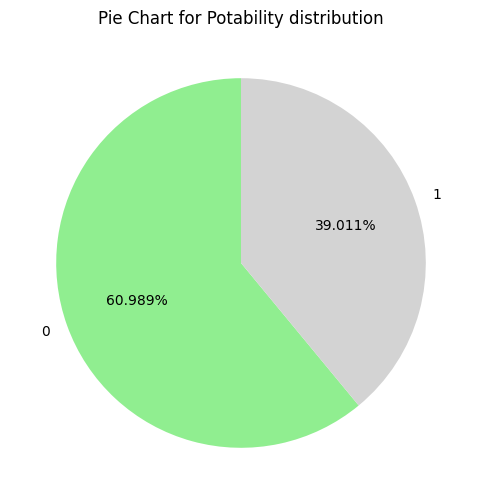

In [15]:
plt.figure(figsize = (8,6))
s_count = df["Potability"].value_counts()
name = ['0', '1']
plt.pie(s_count, labels = name, autopct = '%1.3f%%', startangle = 90, colors = ['lightgreen','lightgrey'])
plt.title("Pie Chart for Potability distribution")
plt.show()

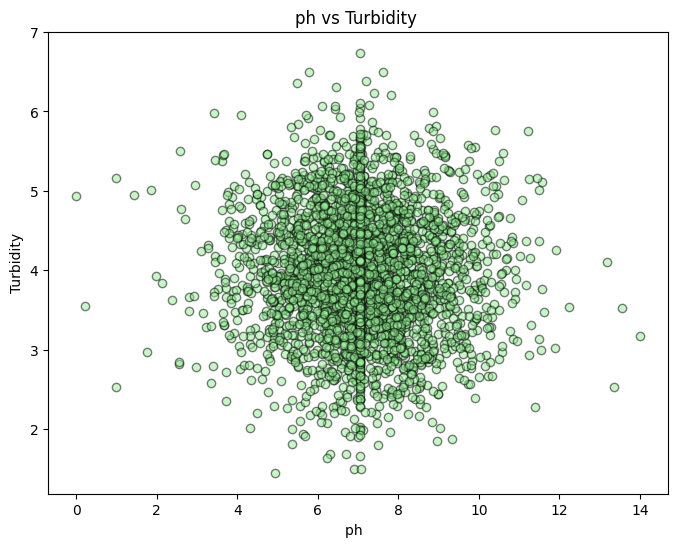

In [16]:
plt.figure(figsize = (8,6))
plt.scatter(df['ph'], df['Turbidity'], c = 'lightgreen', edgecolor = 'k', alpha = 0.5)
plt.title('ph vs Turbidity ')
plt.xlabel('ph  ')
plt.ylabel('Turbidity')
plt.show()

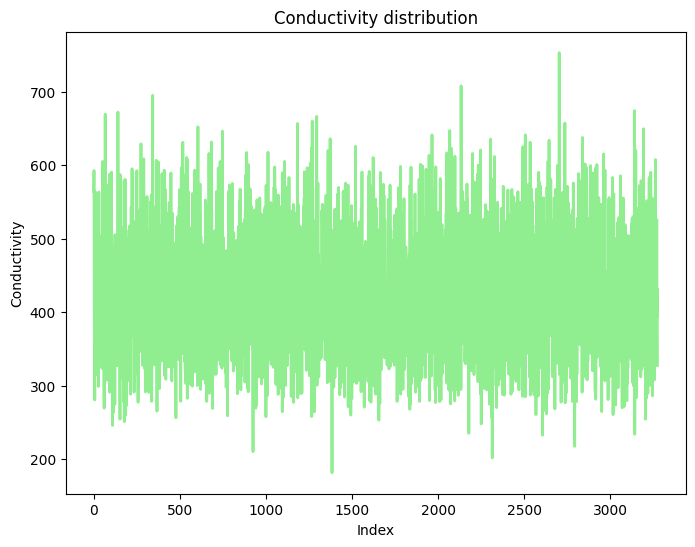

In [17]:
plt.figure(figsize = (8,6))
plt.plot(df.index, df['Conductivity'], c = 'lightgreen', lw = 2)
plt.title('Conductivity distribution')
plt.xlabel('Index')
plt.ylabel('Conductivity')
plt.show()

<Figure size 800x600 with 0 Axes>

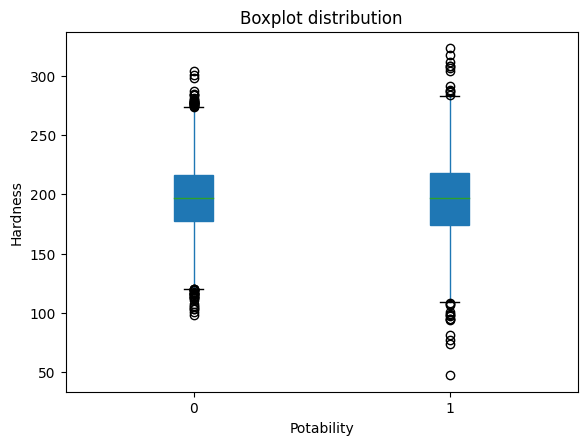

In [18]:
plt.figure(figsize = (8,6))
df.boxplot(column = 'Hardness', by = 'Potability', grid = False, patch_artist = True)
plt.suptitle('')
plt.title('Boxplot distribution')
plt.xlabel('Potability')
plt.ylabel('Hardness')
plt.show()

In [19]:
X = df.drop('Potability', axis=1)  
y = df['Potability'] 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [24]:
knn = KNeighborsClassifier(n_neighbors=3)


knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6326219512195121
Confusion Matrix:
[[310 102]
 [139 105]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.75      0.72       412
           1       0.51      0.43      0.47       244

    accuracy                           0.63       656
   macro avg       0.60      0.59      0.59       656
weighted avg       0.62      0.63      0.63       656

